In [1]:
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report
from scipy import linalg as scipy_linalg
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

import itertools


In [2]:
prosody_data = pd.read_csv('Prosodic_Features_MRH.csv',sep=",")
#expr = pd.read_csv(expr_file, sep="\t")
y = prosody_data['Hired3C'].values
#36
#X =prosody_data[['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgVal2', 'avgVal3', 'avgBand1', 'avgBand2', 'avgBand3', 'fmean1', 'fmean2', 'fmean3', 'f2meanf1', 'f3meanf1', 'f1STD', 'f2STD']]
#49X =prosody_data[['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgVal2', 'avgVal3', 'avgBand1', 'avgBand2', 'avgBand3', 'fmean1', 'fmean2', 'fmean3', 'f2meanf1', 'f3meanf1', 'f1STD', 'f2STD', 'f3STD', 'f2STDf1', 'f2STDf2', 'jitter', 'shimmer', 'jitterRap', 'meanPeriod', 'percentUnvoiced', 'numVoiceBreaks', 'PercentBreaks', 'speakRate', 'numPause', 'maxDurPause']]
#25X = prosody_data[['pitch_quant', 'meanPeriod', 'mean_pitch', 'fmean3', 'f3STD', 'f2STD', 'pitch_sd', 'shimmer', 'avgBand2', 'intensityMean', 'jitter', 'intensitySD', 'intensityQuant', 'jitterRap', 'f1STD', 'avgVal2', 'fmean2', 'PercentBreaks', 'AvgTotFall:3', 'f2STDf1', 'pitch_abs', 'f2STDf2', 'avgBand1', 'percentUnvoiced', 'AvgTotRis:3']]
X = prosody_data.iloc[:, 6:].values

X = StandardScaler().fit_transform(X)
#X = MinMaxScaler().fit_transform(X)


In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=25)
pca.fit(X)
X_pca = pca.transform(X)
principalDf = pd.DataFrame(data = X_pca , columns = ['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10','PC11', 'PC12','PC13', 'PC14','PC15', 'PC16','PC17', 'PC18','PC19', 'PC20','PC21', 'PC22','PC23', 'PC24','PC25'])
principalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,-4.168954,-0.014177,-2.475345,-0.810887,0.158383,-1.744078,-0.390702,0.265557,0.664754,1.053831,...,0.103755,1.158107,-0.448272,-0.798357,-0.337376,0.091438,0.314901,0.192303,0.063893,-0.642735
1,-4.464238,-1.009904,-3.092034,-1.055293,0.230520,-2.541514,-0.267613,0.678307,0.507352,1.239575,...,0.166666,1.432195,-0.265912,-0.719553,-0.078739,0.228056,0.618227,0.058932,0.158185,-0.671569
2,-3.358534,0.101685,-2.585497,0.410778,1.336423,-2.501500,-0.698387,-0.107751,0.624624,1.094847,...,-0.220423,1.292643,-0.222914,-0.221501,0.059954,-0.013420,-0.144926,0.440848,-0.708845,-0.432787
3,0.865701,-2.990583,-3.409886,3.427491,1.778394,-1.202344,0.742876,-1.396202,1.127660,-2.928788,...,1.146561,1.633830,-0.566095,0.949809,0.610062,-0.744662,0.307796,-0.518675,-0.737329,-0.789701
4,1.506023,-3.118672,-3.273643,1.326754,1.733809,-1.359053,1.285821,-1.184057,0.794970,-2.643697,...,1.339917,1.470959,-0.388322,1.199054,-0.148479,-0.133326,0.895259,-0.024241,0.404219,-0.454080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,-1.722865,0.621413,-2.511901,3.169306,-2.441883,-1.714762,-0.227481,0.926876,-1.283814,0.087163,...,-0.957231,0.665817,-0.728949,0.637300,-0.351556,-0.184727,0.174362,0.032904,0.162068,0.076317
676,-2.157176,0.879941,-2.401855,1.721035,-2.208042,-2.682219,-0.636729,1.491810,-1.361853,0.804771,...,-1.064502,0.207463,-0.407370,-0.112606,-0.124446,1.087763,0.687543,0.708878,0.315673,-0.009720
677,-2.407032,2.363606,-1.592129,4.621724,-3.687422,0.870559,1.078026,-1.171054,-1.566512,-2.676464,...,-0.769463,0.922108,-0.664274,0.114941,-0.676506,0.310594,0.012324,-0.523175,-0.080330,-0.377697
678,-0.943823,3.709886,-0.265405,3.604097,-0.754180,-2.480952,-0.034924,1.060394,-0.914385,0.231079,...,-0.862289,0.346159,-0.474816,-0.509796,-0.357339,0.850752,0.000114,0.154458,-0.040301,-0.141929


In [4]:
finalDf = pd.concat([principalDf, prosody_data[['Hired3C']]], axis = 1)
finalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,Hired3C
0,-4.168954,-0.014177,-2.475345,-0.810887,0.158383,-1.744078,-0.390702,0.265557,0.664754,1.053831,...,1.158107,-0.448272,-0.798357,-0.337376,0.091438,0.314901,0.192303,0.063893,-0.642735,1
1,-4.464238,-1.009904,-3.092034,-1.055293,0.230520,-2.541514,-0.267613,0.678307,0.507352,1.239575,...,1.432195,-0.265912,-0.719553,-0.078739,0.228056,0.618227,0.058932,0.158185,-0.671569,1
2,-3.358534,0.101685,-2.585497,0.410778,1.336423,-2.501500,-0.698387,-0.107751,0.624624,1.094847,...,1.292643,-0.222914,-0.221501,0.059954,-0.013420,-0.144926,0.440848,-0.708845,-0.432787,1
3,0.865701,-2.990583,-3.409886,3.427491,1.778394,-1.202344,0.742876,-1.396202,1.127660,-2.928788,...,1.633830,-0.566095,0.949809,0.610062,-0.744662,0.307796,-0.518675,-0.737329,-0.789701,1
4,1.506023,-3.118672,-3.273643,1.326754,1.733809,-1.359053,1.285821,-1.184057,0.794970,-2.643697,...,1.470959,-0.388322,1.199054,-0.148479,-0.133326,0.895259,-0.024241,0.404219,-0.454080,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,-1.722865,0.621413,-2.511901,3.169306,-2.441883,-1.714762,-0.227481,0.926876,-1.283814,0.087163,...,0.665817,-0.728949,0.637300,-0.351556,-0.184727,0.174362,0.032904,0.162068,0.076317,0
676,-2.157176,0.879941,-2.401855,1.721035,-2.208042,-2.682219,-0.636729,1.491810,-1.361853,0.804771,...,0.207463,-0.407370,-0.112606,-0.124446,1.087763,0.687543,0.708878,0.315673,-0.009720,0
677,-2.407032,2.363606,-1.592129,4.621724,-3.687422,0.870559,1.078026,-1.171054,-1.566512,-2.676464,...,0.922108,-0.664274,0.114941,-0.676506,0.310594,0.012324,-0.523175,-0.080330,-0.377697,0
678,-0.943823,3.709886,-0.265405,3.604097,-0.754180,-2.480952,-0.034924,1.060394,-0.914385,0.231079,...,0.346159,-0.474816,-0.509796,-0.357339,0.850752,0.000114,0.154458,-0.040301,-0.141929,0


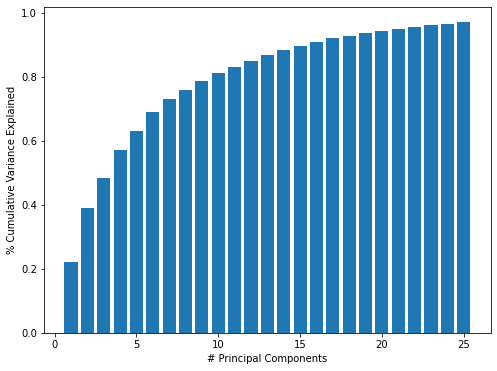

In [5]:
cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

# Plot cumulative explained variance for all PCs

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(1,26), cum_exp_var)
ax.set_xlabel('# Principal Components')
ax.set_ylabel('% Cumulative Variance Explained');

In [6]:
pca.explained_variance_ratio_

array([0.22143425, 0.16851797, 0.09213142, 0.08800173, 0.06151173,
       0.05784391, 0.03947719, 0.02957104, 0.02898775, 0.02342824,
       0.02005332, 0.01888711, 0.01755324, 0.01516364, 0.01337228,
       0.01257713, 0.01059232, 0.008981  , 0.00833448, 0.00676404,
       0.00660713, 0.00618956, 0.00516146, 0.00463767, 0.00427061])

Text(0, 0.5, 'pc2')

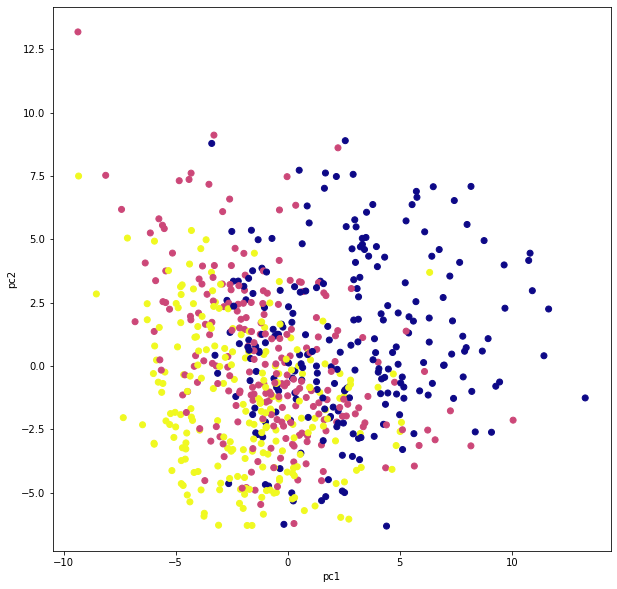

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:,0],X_pca[:,1],c=finalDf['Hired3C'],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0.5, 0, 'PC3')

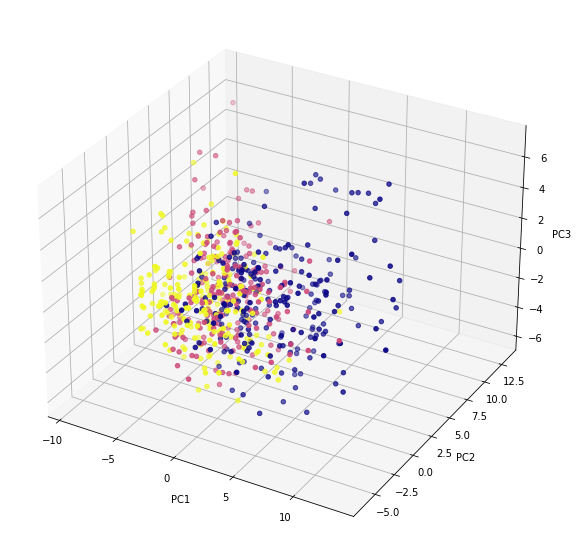

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2], c=finalDf['Hired3C'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

In [9]:
X_centered = X - np.mean(X, axis=0)
cov_matrix = np.dot(X_centered.T, X_centered) / 25
eigenvalues = pca.explained_variance_
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
    print("\n\nEigenvector:",np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    print("Eigenvalue:",eigenvalue)



Eigenvector: 361.38070228426955
Eigenvalue: 13.30562232269036


Eigenvector: 275.021329503267
Eigenvalue: 10.125969422064296


Eigenvector: 150.35847239732865
Eigenvalue: 5.5360262296512825


Eigenvector: 143.61881558989683
Eigenvalue: 5.287879808169986


Eigenvector: 100.38713803296781
Eigenvalue: 3.6961391028338606


Eigenvector: 94.40125763617232
Eigenvalue: 3.475745862892947


Eigenvector: 64.42676646665126
Eigenvalue: 2.37211953117261


Eigenvector: 48.25993921352851
Eigenvalue: 1.776875523325527


Eigenvector: 47.30800845112115
Eigenvalue: 1.7418265261822496


Eigenvector: 38.23488473243151
Eigenvalue: 1.4077645335798539


Eigenvector: 32.727024183533445
Eigenvalue: 1.204971435320605


Eigenvector: 30.823767410023223
Eigenvalue: 1.1348957072812595


Eigenvector: 28.6468812448838
Eigenvalue: 1.054745259352271


Eigenvector: 24.747054990484386
Eigenvalue: 0.9111581365805043


Eigenvector: 21.823560344645706
Eigenvalue: 0.8035184211565876


Eigenvector: 20.52587623745635
Eigenvalu

In [10]:
def CreateModel( X_train, X_test, y_train, y_test):
    y_21_test = []
    for i in y_test:
        if(i == 2):
            y_21_test.append(2)
        else:
            y_21_test.append(1)

    y_21_train = []
    for i in y_train:
        if(i == 2):
            y_21_train.append(2)
        else:
            y_21_train.append(1)

    X = X_train
    y = y_21_train
    clf =RandomForestClassifier(n_estimators=600)
    clf.fit(X, y)
    clf.score(X, y)
    #AdaBoostClassifier(n_estimators=100, random_state=0)
    y_21_predict=clf.predict(X_test)
    target_names = ['class 2', 'class 1']      
    print(classification_report(y_21_test,y_21_predict,target_names=target_names, zero_division=0))

    X_10_train = X_train.loc[y_train!= 2]
    #X_10_train =X_train[:,26] != 2
    X_10_test = X_test.loc[y_test!= 2]
    #X_10_test = X_test[:,26] != 2
    #select from y_train where y value is not 2
    y_10_train= []
    for i in y_train:
        if(i != 2):
            y_10_train.append(i)

    #select from y_test where y value is not 2
    y_10_test = []
    for i in y_test:
        if(i != 2):
            y_10_test.append(i)

    X = X_10_train
    y = y_10_train
    clf = RandomForestClassifier(n_estimators=600)
    clf.fit(X, y)
    clf.score(X, y)
    y_10_predict = clf.predict(X_10_test)
    target_names = ['class 1', 'class 0']      
    print(classification_report(y_10_test,y_10_predict ,target_names=target_names, zero_division=0))

    y1=list(y_test)
    y2=list(y_21_predict)
    y3=list(y_10_predict)
    combined_Predictions = []
    k=0
    for (i,j) in zip(y1,y2):
        if(i!=2):
            combined_Predictions.append(y3[k])
            k=k+1
        else:
            combined_Predictions.append(j)
    #target_names = ['class 0', 'class 1', 'class 2']
    #print(classification_report(y_test,combined_Predictions ,target_names=target_names, zero_division=0))
    acc = accuracy_score(y_test, combined_Predictions, normalize=True)

    return acc 


In [11]:
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=12)
cvscores =[]
X= finalDf[['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10','PC11', 'PC12','PC13', 'PC14','PC15', 'PC16','PC17', 'PC18','PC19', 'PC20','PC21', 'PC22','PC23', 'PC24','PC25']]
y=finalDf['Hired3C']
for train_index, test_index in skf.split(X, y):


    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    
    scores = CreateModel( X_train, X_test, y_train, y_test)
    
    
    cvscores.append(scores*100)
print(cvscores ) 
print("CV Score: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))


              precision    recall  f1-score   support

     class 2       0.88      1.00      0.94        46
     class 1       1.00      0.73      0.84        22

    accuracy                           0.91        68
   macro avg       0.94      0.86      0.89        68
weighted avg       0.92      0.91      0.91        68

              precision    recall  f1-score   support

     class 1       0.96      1.00      0.98        23
     class 0       1.00      0.96      0.98        23

    accuracy                           0.98        46
   macro avg       0.98      0.98      0.98        46
weighted avg       0.98      0.98      0.98        46

              precision    recall  f1-score   support

     class 2       0.96      0.98      0.97        46
     class 1       0.95      0.91      0.93        22

    accuracy                           0.96        68
   macro avg       0.95      0.94      0.95        68
weighted avg       0.96      0.96      0.96        68

              preci